Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [6]:
df = pd.read_csv('./data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

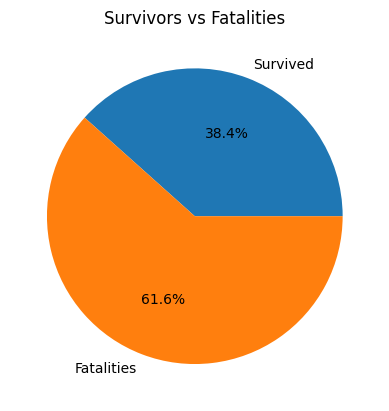

In [8]:
survived_count = df['Survived'].value_counts()[1]
fatalities_count = df['Survived'].value_counts()[0]

plt.pie([survived_count, fatalities_count], labels=['Survived', 'Fatalities'], autopct='%1.1f%%')
plt.title('Survivors vs Fatalities')
plt.show()

На графіку видно, що лише приблизно третина пасажирів вижила.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


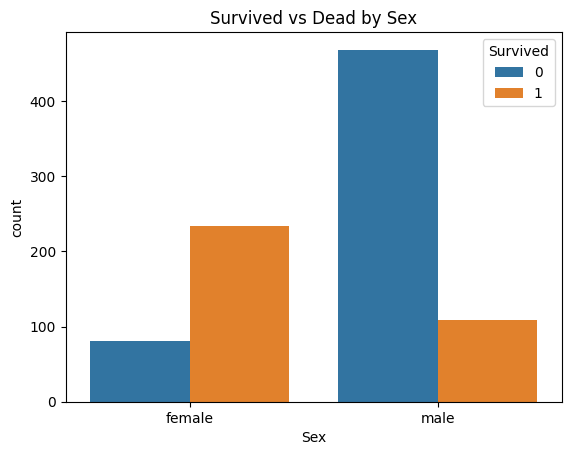

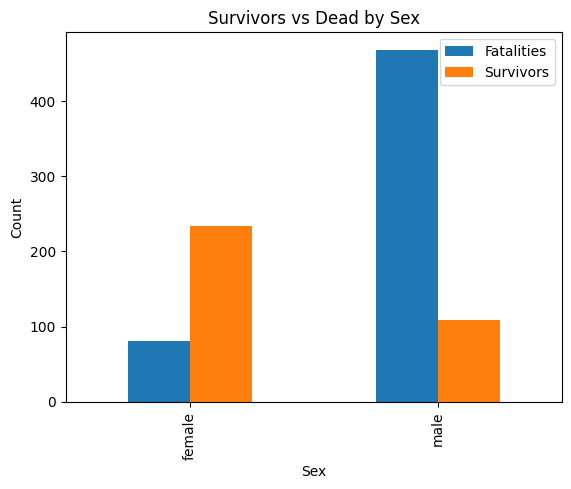

In [37]:
gender_counts = df.groupby(['Sex', 'Survived'], as_index=False).size()
gender_counts = gender_counts.pivot(index='Sex', columns='Survived', values='size')
gender_counts.plot(kind='bar', stacked=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survivors vs Dead by Sex')
plt.legend(['Fatalities', 'Survivors'])
plt.show()

Графік показує, що пропорційно жінок вижило вдвічі більше, а чоловіків загинуло у 5 разів більше, ніж вижило, що може показувати, що пріоритет порятунку надавався жінкам.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

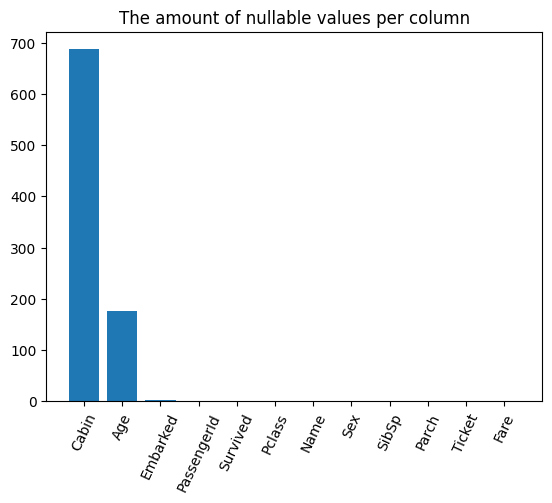

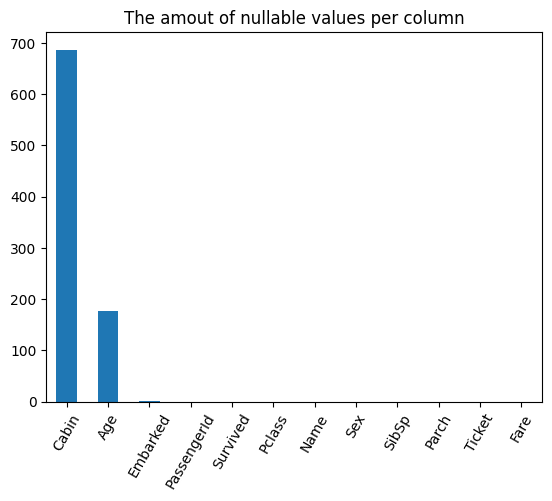

In [23]:
missing_values_count = df.isnull().sum().sort_values(ascending=False)
missing_values_count.plot(kind='bar')
plt.title('The amout of nullable values per column')
plt.xticks(rotation=60)
plt.show()

З графіку видно, що основне джерело інформації - квитки, оскільки вся інформація, що міститься в квитках, присутня в дата фреймі, такі як номер квитка, ім'я, стать, вік скоріше за все не був вимогою для покупки квитка і його просто не вказували. Щодо кают, певно що квитки не містили інформації про конкретну кабіну, і пасажирів розміщували у вільні каюти або просто по класам кают.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

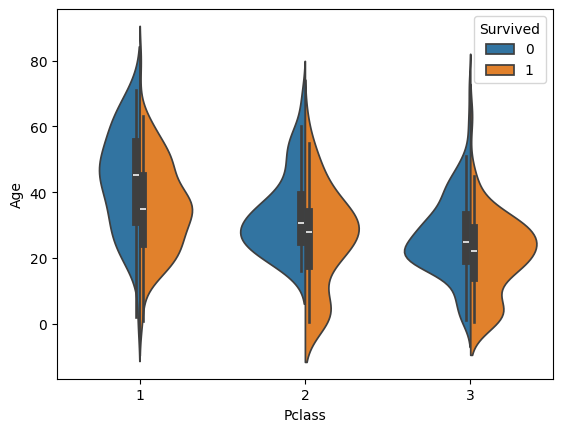

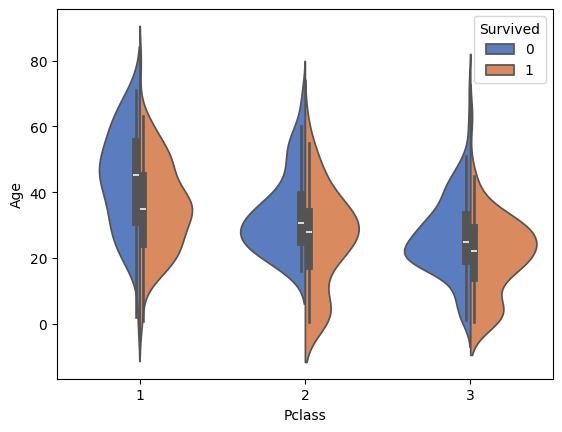

In [25]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, palette='muted')
plt.show()

Цей графік, що називається violin plot, демонструє розподіл віку серед пасажирських класів, розділений за статусом виживання.

На графіку представлено три пари графіків у вигляді скрипок, кожна пара відповідає класу пасажирів. В кожній парі є два розподіли віку — один для осіб, які вижили, та для тих, хто не вижив. Форма кожного графіка показує щільність розподілу на різних вікових групах, тобто ширші секції скрипки вказують на більшу концентрацію пасажирів того віку.

Медіанний вік позначений білою точкою, інтерквартильний діапазон представлений товстою лінією в центрі.

Пасажири першого класу мали кращі шанси на виживання, особливо у віковій групі 30-50 років. У другому класі розподіл віку серед виживших та невиживших був схожий, але з легким зсувом медіанного віку виживших у бік молодших пасажирів. У третьому класі було багато молодих пасажирів, які не вижили, свідчачи про найнижчі шанси на виживання у цьому класі.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


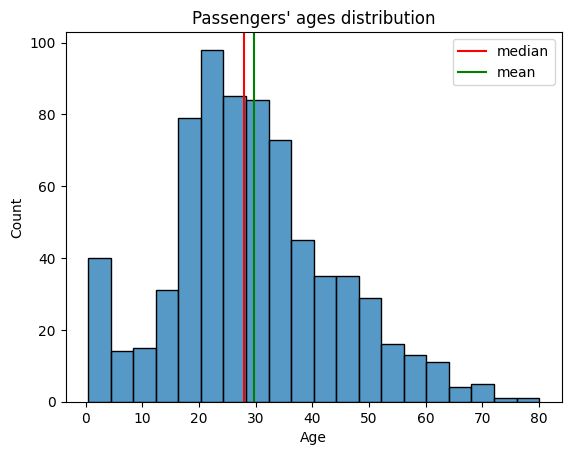

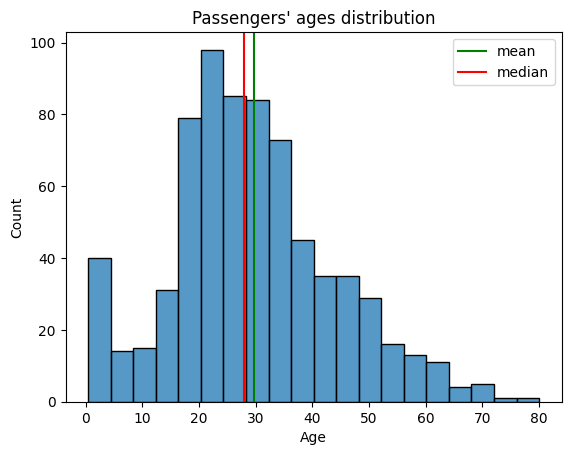

In [32]:
sns.histplot(df['Age'])
plt.axvline(df['Age'].mean(), color='green', label='mean')
plt.axvline(df['Age'].median(), color='red', label='median')
plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

Графік показує розподіл віку пасажирів, з використанням гістограми для візуалізації частоти різних вікових груп. Зелена лінія вказує середній вік пасажирів, а червона суцільна лінія вказує медіанний вік.

На цьому графіку більшість пасажирів знаходяться у віковій категорії близько 20-30 років. Середній вік трохи вищий за медіанний, що може вказувати на деяку асиметрію розподілу, з відносно більшою кількістю старших пасажирів, яка підтягує середнє значення вгору, в той час як медіана вказує на вік, який ділить пасажирів на дві рівні групи.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Як може кількість супутників (розмір сім'ї), із якими пасажир подорожував на Титаніку, впливати на його шанси на виживання?

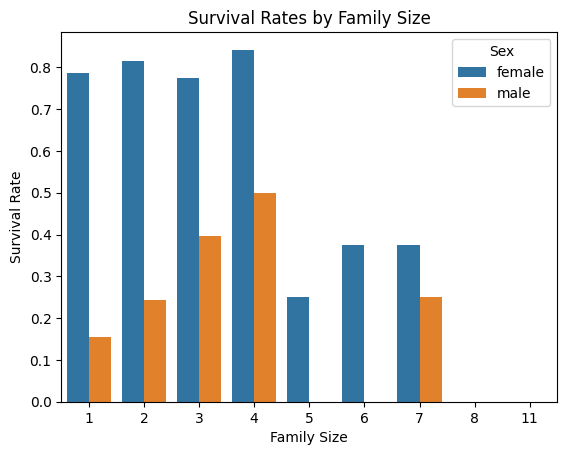

In [40]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # Add one for the passenger itself

sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None, hue='Sex')
plt.title('Survival Rates by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

- Жінки мали значно вищі шанси на виживання ніж чоловіки у всіх категоріях розміру сім'ї, що відповідає даним з інших графіків
- Шанси на виживання для жінок були найвищими при розмірі сім'ї від 2 до 4 осіб, після чого спостерігається зниження для більших сімей, з невеликим підйомом для сімей розміром у 6-7 осіб.
- Чоловіки мали менше шансів на виживання, якщо подорожували наодинці, чоловіки з сім'ями розміром 4 особи мали найбільші шанси: це може бути пов'язано з тим, що дітей відправляли у рятувальні човни разом з татами.
- Сім'ї розміром 5-6 людей складались лише із жінок
- Не було сімей розміром більше 7